In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns


In [2]:
df = pd.read_csv('phl_exoplanet_catalog_2019.csv')
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


(4048, 112)

In [4]:
df.isnull().sum().sum()
# 453,376 total data points
# 149,723 null data points
# about 33.02% of our data is null values

149723

In [5]:
# we need to deal with all these null values
# https://git.txstate.edu/ML/2022Fall/blob/main/project/examples/FeatureSelectionAndModeling.ipynb
# method for dealing with null values

# data normalization might be needed for some of these values, such as p_mass, since the range of values is large
# this might cause our model to put more weight on planets with a larger mass (drowns out low mass planets data points)

In [6]:
df.fillna(df.mean(),inplace=True)

df.isnull().sum().sum()

C:\Users\noahp\AppData\Local\Temp\ipykernel_9496\1673558777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


31494

In [7]:
df = df.dropna(axis = 1)
df.isnull().sum().sum()

0

In [8]:
df.shape
# Dropped all the columns that were unable to be given values, 19 columns were dropped

(4048, 101)

In [9]:
#   https://datascienceparichay.com/article/get-correlation-between-columns-of-pandas-dataframe/
#   we will find correlation between p_habitable and each matrix, rather than a corr_matrix of 112 columns 

<AxesSubplot:>

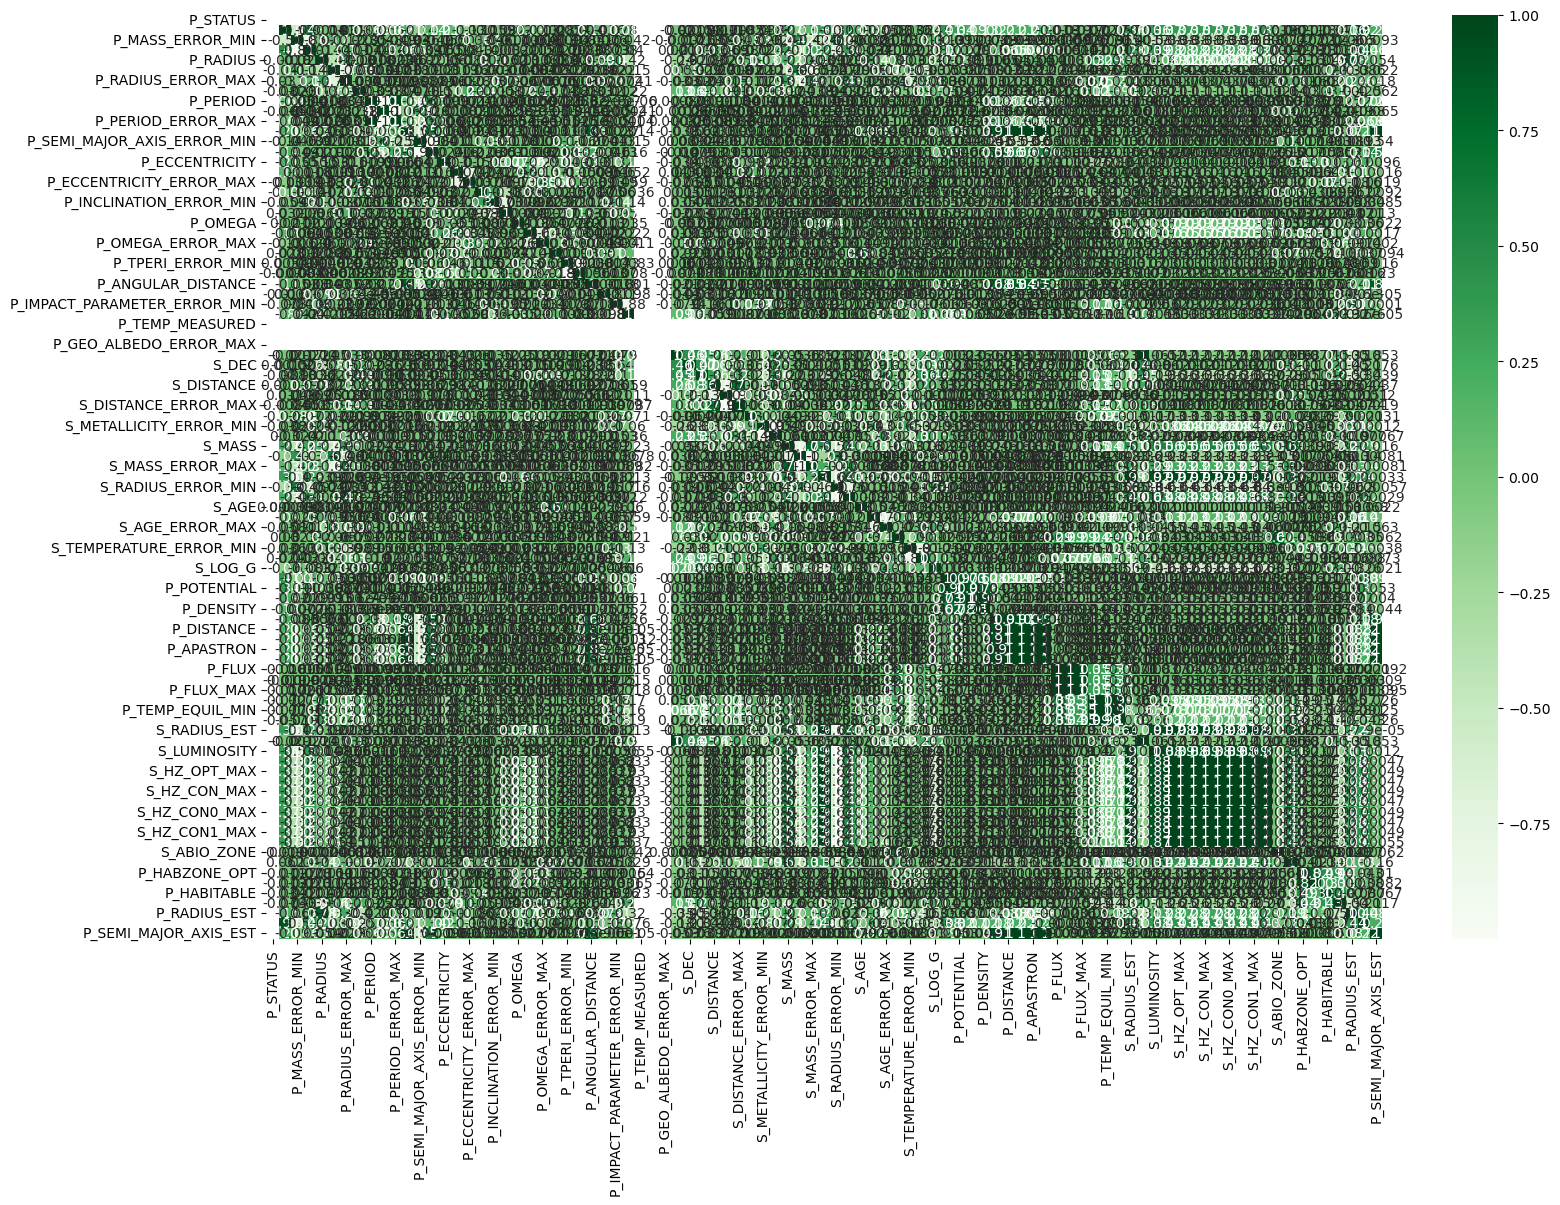

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap = 'Greens', annot = True)

In [11]:
# the correlation matrix is too large to interpret, will need to run correlation between matricies individually

In [12]:
print("Variable correlation to Habitability")
print("P_MASS =",df["P_HABITABLE"].corr(df["P_MASS"]))
print("P_PERIOD =",df["P_HABITABLE"].corr(df["P_PERIOD"]))
print("P_SEMI_MAJOR_AXIS =",df["P_HABITABLE"].corr(df["P_SEMI_MAJOR_AXIS"]))
# 
print("P_ECCENTRICITY =",df["P_HABITABLE"].corr(df["P_ECCENTRICITY"]))

print("P_OMEGA =",df["P_HABITABLE"].corr(df["P_OMEGA"]))

print("P_TPERI =",df["P_HABITABLE"].corr(df["P_TPERI"]))

print("P_ANGULAR_DISTANCE =",df["P_HABITABLE"].corr(df["P_ANGULAR_DISTANCE"]))

print("P_IMPACT_PARAMETER =",df["P_HABITABLE"].corr(df["P_IMPACT_PARAMETER"]))

print("S_RA =",df["P_HABITABLE"].corr(df["S_RA"]))
print("S_DEC =",df["P_HABITABLE"].corr(df["S_DEC"]))
print("S_MAG =",df["P_HABITABLE"].corr(df["S_MAG"]))

print("S_DISTANCE =",df["P_HABITABLE"].corr(df["S_DISTANCE"]))
print("S_METALLICITY =",df["P_HABITABLE"].corr(df["S_METALLICITY"]))
print("S_MASS =",df["P_HABITABLE"].corr(df["S_MASS"]))
print("S_RADIUS =",df["P_HABITABLE"].corr(df["S_RADIUS"]))
print("S_AGE =",df["P_HABITABLE"].corr(df["S_AGE"]))
print("S_TEMPERATURE =",df["P_HABITABLE"].corr(df["S_TEMPERATURE"]))
print("P_POTENTIAL =",df["P_HABITABLE"].corr(df["P_POTENTIAL"]))
print("P_GRAVITY =",df["P_HABITABLE"].corr(df["P_GRAVITY"]))
print("P_DENSITY =",df["P_HABITABLE"].corr(df["P_DENSITY"]))
print("P_HILL_SPHERE =",df["P_HABITABLE"].corr(df["P_HILL_SPHERE"]))
print("P_DISTANCE =",df["P_HABITABLE"].corr(df["P_DISTANCE"]))
print("P_PERIASTRON =",df["P_HABITABLE"].corr(df["P_PERIASTRON"]))
print("P_APASTRON =",df["P_HABITABLE"].corr(df["P_APASTRON"]))
print("P_DISTANCE_EFF =",df["P_HABITABLE"].corr(df["P_DISTANCE_EFF"]))
print("P_FLUX =",df["P_HABITABLE"].corr(df["P_FLUX"]))
print("P_TEMP_EQUIL =",df["P_HABITABLE"].corr(df["P_TEMP_EQUIL"]))
print("S_RADIUS_EST =",df["P_HABITABLE"].corr(df["S_RADIUS_EST"]))
print("S_RA_H =",df["P_HABITABLE"].corr(df["S_RA_H"]))
print("S_LUMINOSITY =",df["P_HABITABLE"].corr(df["S_LUMINOSITY"]))
print("S_SNOW_LINE =",df["P_HABITABLE"].corr(df["S_SNOW_LINE"]))
print("S_ABIO_ZONE =",df["P_HABITABLE"].corr(df["S_ABIO_ZONE"]))
print("S_TIDAL_LOCK =",df["P_HABITABLE"].corr(df["S_TIDAL_LOCK"]))
print("P_ESI =",df["P_HABITABLE"].corr(df["P_ESI"]))
print("P_Radius_EST =",df["P_HABITABLE"].corr(df["P_RADIUS_EST"]))

Variable correlation to Habitability
P_MASS = -0.03403119000270116
P_PERIOD = -0.002152545890789632
P_SEMI_MAJOR_AXIS = -0.00882438964305905
P_ECCENTRICITY = -0.0131496625160918
P_OMEGA = -0.01686216585063099
P_TPERI = -0.14128537065259153
P_ANGULAR_DISTANCE = -0.005647003004173545
P_IMPACT_PARAMETER = -0.00889955008747271
S_RA = -0.015004635168979649
S_DEC = -0.020632138230785326
S_MAG = 0.04570613443673371
S_DISTANCE = -0.05129925402939203
S_METALLICITY = -0.09292237858640502
S_MASS = -0.08317613394934689
S_RADIUS = -0.029122676172255144
S_AGE = -0.11049934606970219
S_TEMPERATURE = -0.09024274504367436
P_POTENTIAL = -0.007099029463562221
P_GRAVITY = -0.0037540030378057916
P_DENSITY = -0.0029441631412524018
P_HILL_SPHERE = -0.005338255033050306
P_DISTANCE = -0.006725587848348539
P_PERIASTRON = -0.006472263912548788
P_APASTRON = -0.006854996259419045
P_DISTANCE_EFF = -0.0066867203802284765
P_FLUX = -0.00632165516158597
P_TEMP_EQUIL = -0.1411314531652923
S_RADIUS_EST = -0.03132734279804

In [13]:
corr_habitable = corr_matrix['P_HABITABLE']
corr_habitable = corr_habitable.dropna()
corr_habitable = corr_habitable.abs()
corr_habitable = corr_habitable.drop('P_HABITABLE')
corr_habitable = corr_habitable.sort_values()

In [23]:
top10 = corr_habitable.tail(10)
top25 = corr_habitable.tail(25)

In [15]:
print(top10)

S_METALLICITY       0.092922
S_AGE               0.110499
S_TIDAL_LOCK        0.136728
P_TEMP_EQUIL_MIN    0.140296
P_TEMP_EQUIL        0.141131
P_TPERI             0.141285
P_TEMP_EQUIL_MAX    0.142674
P_HABZONE_CON       0.298875
P_ESI               0.427036
P_HABZONE_OPT       0.491481
Name: P_HABITABLE, dtype: float64


In [24]:
print(top25)

S_HZ_OPT_MAX                0.049386
S_HZ_CON1_MAX               0.049387
S_HZ_CON0_MAX               0.049387
S_HZ_CON_MAX                0.049387
P_OMEGA_ERROR_MAX           0.049910
S_DISTANCE                  0.051299
S_HZ_CON0_MIN               0.051827
S_HZ_CON1_MIN               0.051897
S_HZ_CON_MIN                0.051900
S_HZ_OPT_MIN                0.051901
S_SNOW_LINE                 0.055036
P_ECCENTRICITY_ERROR_MAX    0.074497
P_RADIUS_EST                0.076826
S_MASS                      0.083176
S_TEMPERATURE               0.090243
S_METALLICITY               0.092922
S_AGE                       0.110499
S_TIDAL_LOCK                0.136728
P_TEMP_EQUIL_MIN            0.140296
P_TEMP_EQUIL                0.141131
P_TPERI                     0.141285
P_TEMP_EQUIL_MAX            0.142674
P_HABZONE_CON               0.298875
P_ESI                       0.427036
P_HABZONE_OPT               0.491481
Name: P_HABITABLE, dtype: float64


In [17]:
subset = df[["P_MASS","P_ECCENTRICITY", "P_OMEGA", "P_TPERI", "S_RA", "S_DEC", "S_MAG", "S_DISTANCE", "S_METALLICITY", "S_MASS", "S_RADIUS", "S_AGE", "S_TEMPERATURE", "P_TEMP_EQUIL", "S_RADIUS_EST", "S_DISTANCE", "S_RA_H", "S_LUMINOSITY", "S_SNOW_LINE", "S_RA_H", "S_TIDAL_LOCK", "P_ESI", "P_RADIUS_EST", "P_HABITABLE"]]

In [18]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P_MASS          4048 non-null   float64
 1   P_ECCENTRICITY  4048 non-null   float64
 2   P_OMEGA         4048 non-null   float64
 3   P_TPERI         4048 non-null   float64
 4   S_RA            4048 non-null   float64
 5   S_DEC           4048 non-null   float64
 6   S_MAG           4048 non-null   float64
 7   S_DISTANCE      4048 non-null   float64
 8   S_METALLICITY   4048 non-null   float64
 9   S_MASS          4048 non-null   float64
 10  S_RADIUS        4048 non-null   float64
 11  S_AGE           4048 non-null   float64
 12  S_TEMPERATURE   4048 non-null   float64
 13  P_TEMP_EQUIL    4048 non-null   float64
 14  S_RADIUS_EST    4048 non-null   float64
 15  S_DISTANCE      4048 non-null   float64
 16  S_RA_H          4048 non-null   float64
 17  S_LUMINOSITY    4048 non-null   f

<AxesSubplot:>

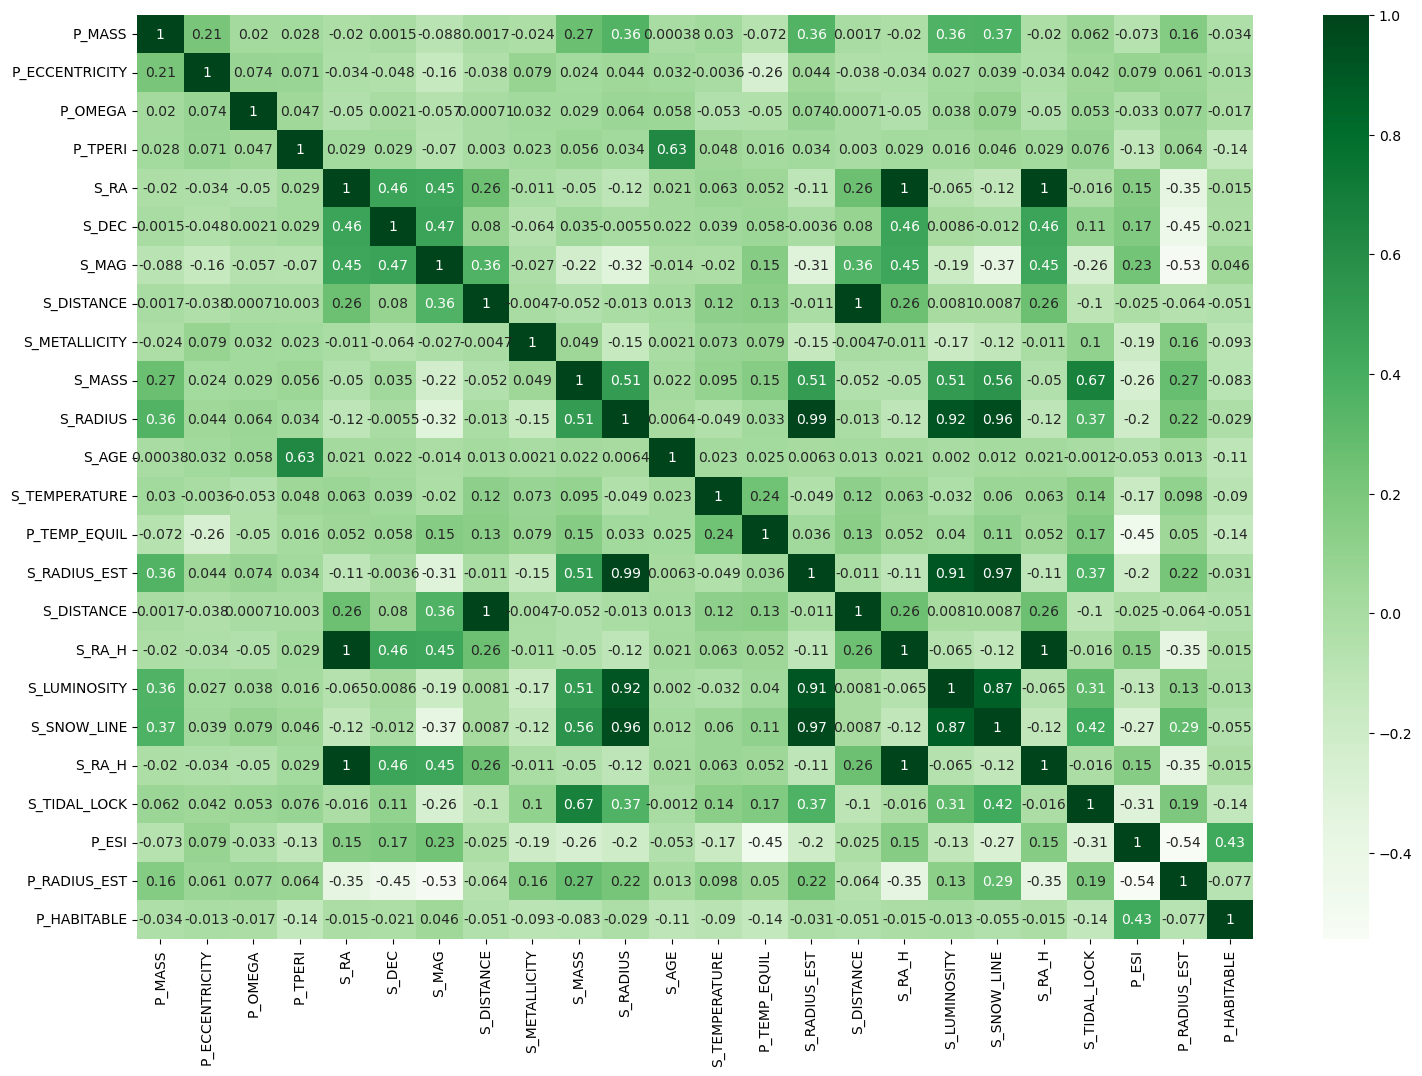

In [19]:
corr_matrix2 = subset.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix2, cmap = 'Greens', annot = True)